# 방범용CCTV 위치와 인구 데이터 분석
- https://data.busan.go.kr/bdip/
- 파일데이터 "부산광역시_방범용CCTV 정보_20230622.csv" 다운로드
- 목표 : CCTV 수를 파악하고, 인구대비 CCTV 비율을 파악
- 인구대비 CCTV의 평균치를 확인하고 그로부터 CCTV가 과하게 부족한 구를 확인

In [1]:
import pandas as pd
file_path = "./ref/부산광역시_방범용CCTV 정보_20230622.csv"
cctv = pd.read_csv(file_path, encoding="EUC-KR")
cctv.sample(3)

,CCTV 명칭,CCTV 좌표,CCTV 그룹
2693,0306-12-괘법동123-6(괘법동)_공원_굴다리입구_고1,"10.1.11.208:0:0:0:0:0:0,10.1.11.208:9400:",사상-12차
689,0288-8-장전2동_금정로42_신한은행사거리,"10.1.11.142:0:0:0:0:0:0,10.1.11.142:9400:",금정-8차
3029,0270-9-학장동-구덕우성어린이집,"10.1.11.164:0:0:0:0:0:0,10.1.11.164:9400:",사상-9차


In [2]:
#CCTV.columns = ["x","xx","local"]
cctv = cctv.rename(columns={"CCTV 그룹":"local"})["local"]

In [3]:
#방법 1
#cctv = cctv.apply(lambda x : x.split("-")[0])

#방법2
local_list = []
for v in cctv:
    local_list.append(v.split("-")[0])
cctv = pd.Series(local_list)
#방법3
#cctv = cctv.str.extract(r"(\D+)-")[0]

cctv = cctv.value_counts()
cctv = cctv.reset_index()

In [4]:
cctv.columns = ["local","count"]
cctv

,local,count
0,사하,431
1,사상,422
2,해운대,418
3,동래,404
4,금정,403
5,북구,403
6,진구,395
7,영도,381
8,연제,377
9,동구,374


- 행정동별 연령별 인구현황
- https://jumin.mois.go.kr/ageStatMonth.do
- 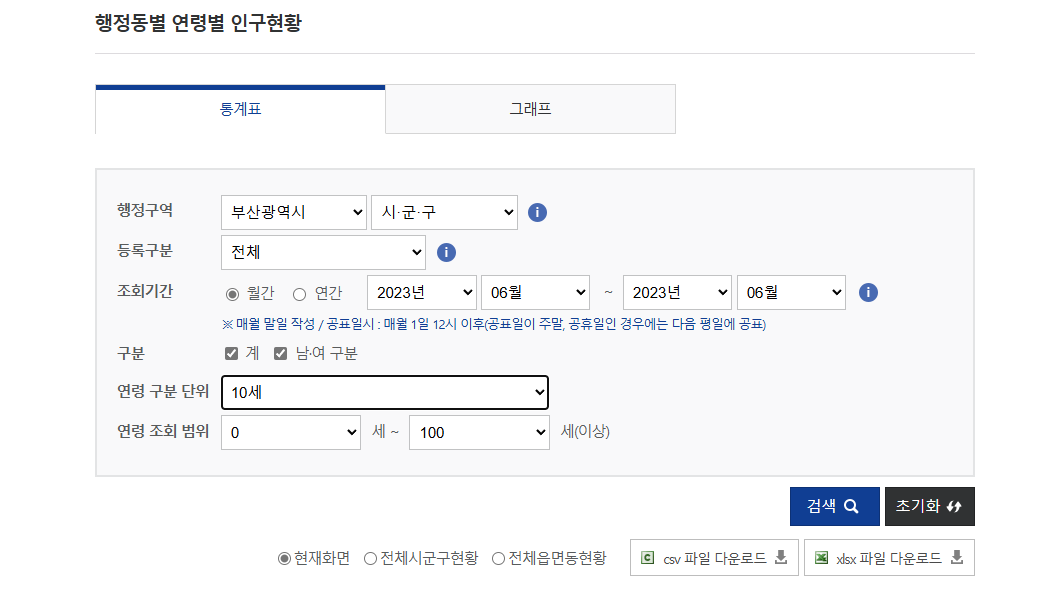

In [5]:
import pandas as pd
import warnings
warnings.simplefilter("ignore", UserWarning)

file2_path = "./ref/202306_202306_연령별인구현황_월간.xlsx"
ori = pd.read_excel(file2_path, sheet_name="연령별인구현황")
ori.head(1)

,행정기관코드,행정기관,총 인구수,연령구간인구수,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,...,10~19세.2,20~29세.2,30~39세.2,40~49세.2,50~59세.2,60~69세.2,70~79세.2,80~89세.2,90~99세.2,100세 이상.2
0,2600000000,부산광역시,"3,306,993","3,306,993","200,627","264,771","386,558","393,792","489,807","539,964",...,"128,872","187,837","191,071","242,526","276,337","296,378","172,706","87,000","13,119",384


In [6]:
data = ori[["행정기관","총 인구수"]]
data.columns = ["local","population"]
data = data.loc[1:]
data["local"] = data["local"].apply(lambda x : x.replace("부산광역시",""))
data = data.reset_index(drop=True) #drop = True는 기존 인덱스를 삭제하고 새롭게 부여
data

,local,population
0,중구,"39,311"
1,서구,"104,449"
2,동구,"86,809"
3,영도구,"107,006"
4,부산진구,"357,475"
5,동래구,"272,590"
6,남구,"255,786"
7,북구,"276,684"
8,해운대구,"383,355"
9,사하구,"300,922"


In [7]:
cctv

,local,count
0,사하,431
1,사상,422
2,해운대,418
3,동래,404
4,금정,403
5,북구,403
6,진구,395
7,영도,381
8,연제,377
9,동구,374


In [8]:
total = pd.concat([cctv,data],axis=1)
#cctv = cctv.sort_calues(by="local",ascending=True)
#data = data.sort_calues(by="local",ascending=True)
#방법1
total.columns = ["local","count","localx","population"]
total = total.drop(columns = ["localx"])

#방법2
total = total.drop(total.columns[2],axis=1) #이름이 같을경우 인덱스가 사용안됨
total

,local,count
0,사하,431
1,사상,422
2,해운대,418
3,동래,404
4,금정,403
5,북구,403
6,진구,395
7,영도,381
8,연제,377
9,동구,374


In [9]:
#cctv = cctv.sort_calues(by="local",ascending=True)
#data = data.sort_calues(by="local",ascending=True)


In [ ]:
#data["local"] = data['local'].apply(lambda x : x.replace(" ",""))
data["local"] = data['local'].apply(lambda x : x.replace("구","").replace("군","").replace("부산진","진구") if len(x.strip())>2 else x)
data

In [18]:
total = pd.merge(cctv,data,on = "local")# merge는 똑같은 값을 가지는 2개의 데이터프레임을 하나로 합칠때 사용 이때 on을 붙이고 어떤걸 하나로 합칠건지 정해줘야함
total["population"] = total["population"].str.replace(",","").astype(int)
total = total.sort_values(by="population", ascending=False)
total

,local,count,population
2,해운대,418,383355
6,진구,395,357475
0,사하,431,300922
5,북구,403,276684
3,동래,404,272590
12,남구,351,255786
4,금정,403,218711
1,사상,422,203029
8,연제,377,202919
14,기장,344,179384
